In [ ]:
# USEFUL PANDAS TOOLS

#Changing an index to a datetime
pd.to_datetime(df.index)

#Joining two dataframes
df1.join(df2)

#Resample data (e.g. from daily to weekly)
df = df.resample(rule='W', how='last')

#Computing the percent changes in a time series
df['col'].pct_change()

#Computing differences in a time series
df['col'].diff()

#Correlation
df['ABC'].corr(df['XYZ'])

#AutoCorrelation
df['ABC'].autocorr()


# Correlation

## Common Mistake: Correlation of two trending Series
- if two series are trending then correlation will be high
- you want to examine the correlation between returns, not absolute levels
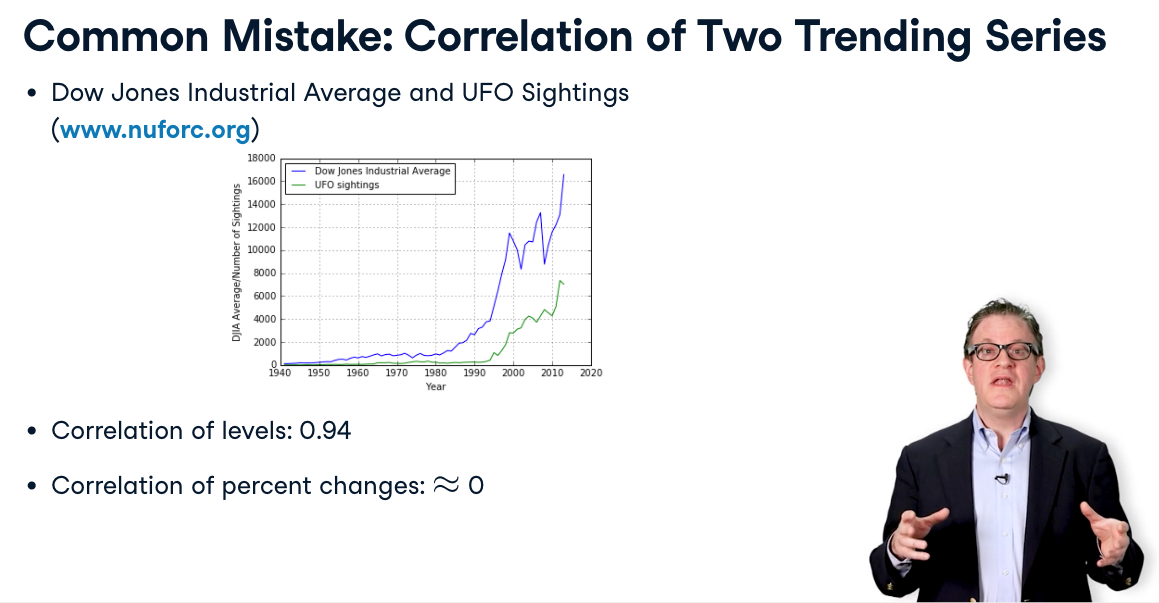


# Regression of two time series
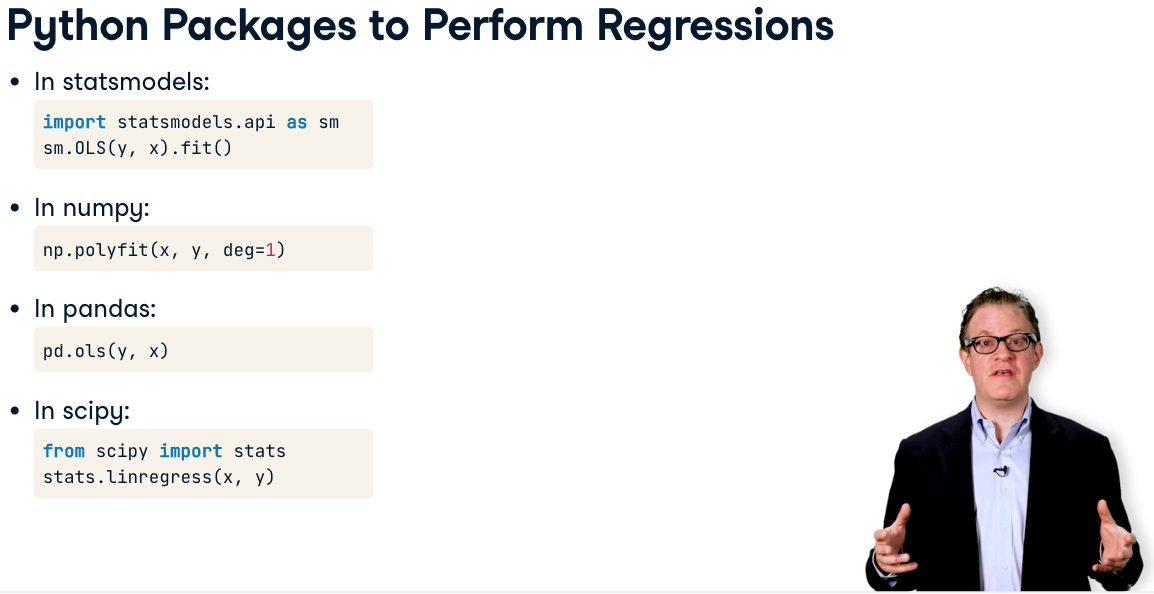

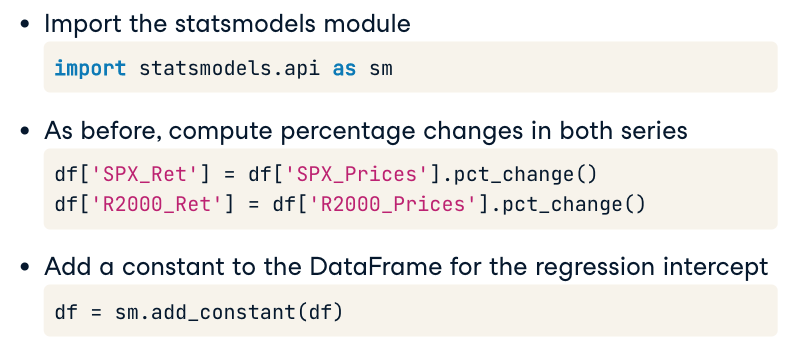

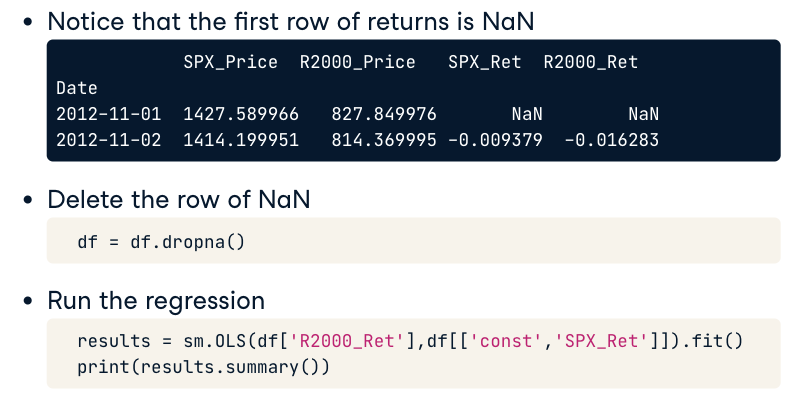

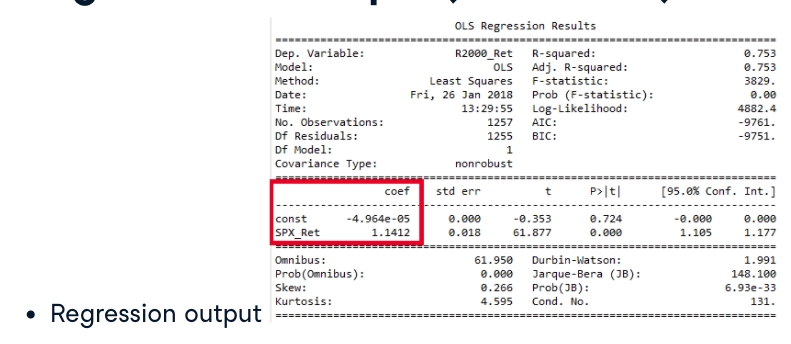

# AutoCorrelation (or Serial Correlation)


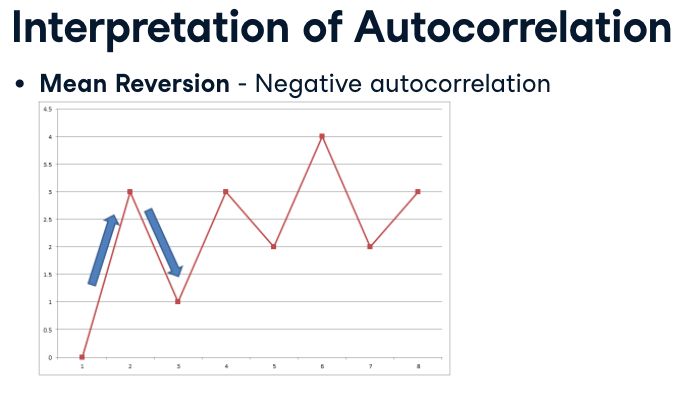

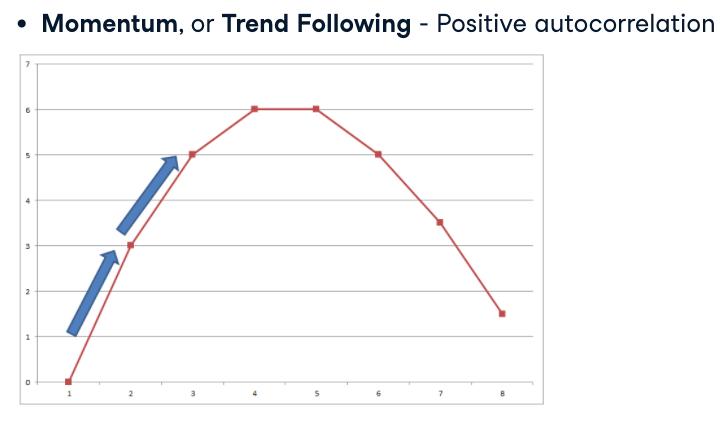

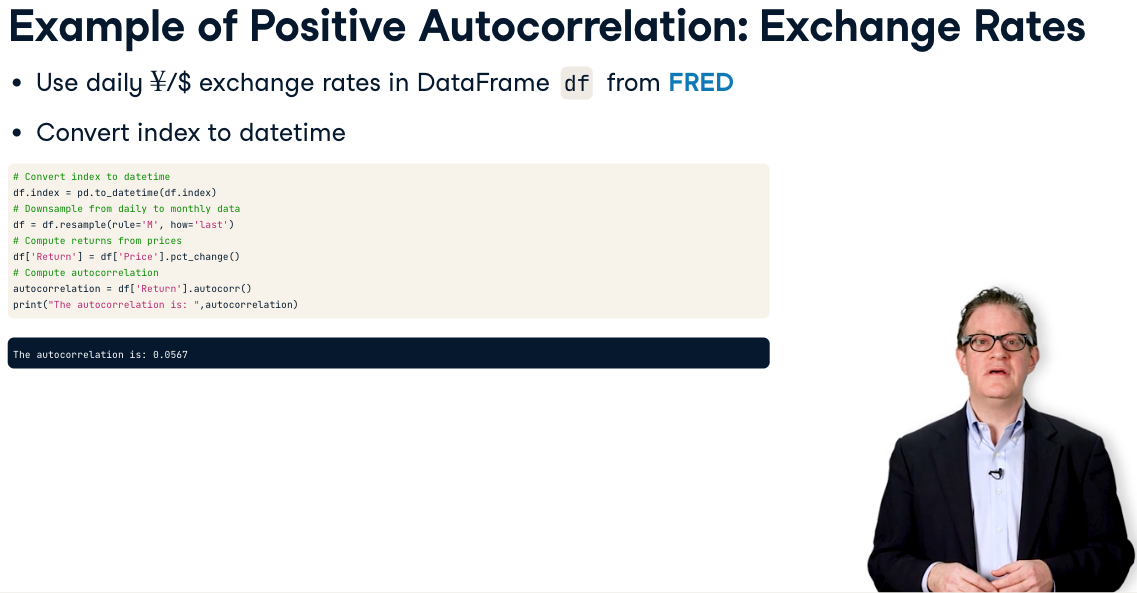


# Autocorrelation Function (ACF)

The sample autocorrelation function, or ACF,shows not only the lag-one autocorrelation, but the entire autocorrelation function for different lags. Any significant non-zero autocorrelations implies that the series can be forecast from the past.

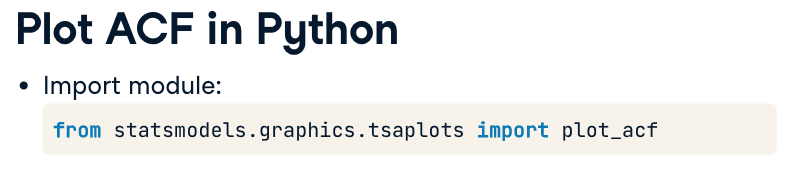

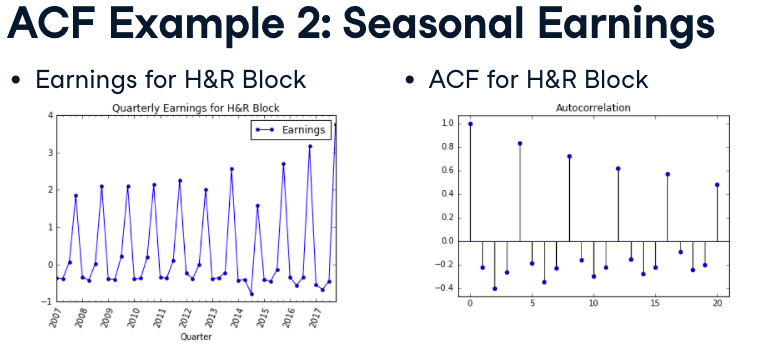
you can clearly see a seasonal pattern in the quarterly data on the left, and the autocorrelation function on the right shows strong autocorrelation at lags 4, 8, 12, 16, and 20

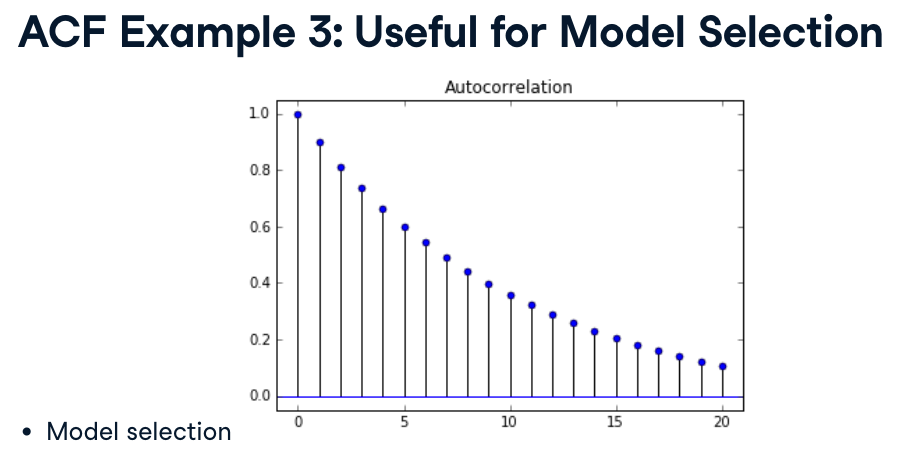
The ACF can also be useful for selecting a parsimonious model for fitting the data. Parsimonious models are simple models with great explanatory predictive power. They explain data with a minimum number of parameters, or predictor variables. The idea behind parsimonious models stems from Occam's razor, or “the law of briefness” (sometimes called lex parsimoniae in Latin)

In this example, the pattern of the autocorrelation suggests a model for the series



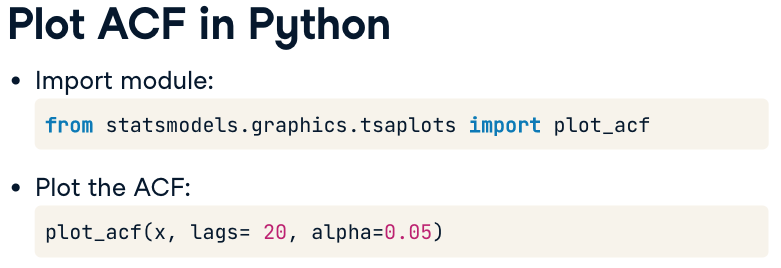
plot_acf is the statsmodels function for plotting the autocorrelation function. The input x is a series or array. The argument lags indicates how many lags of the autocorrelation function will be plotted. The alpha argument sets the width of the confidence interval

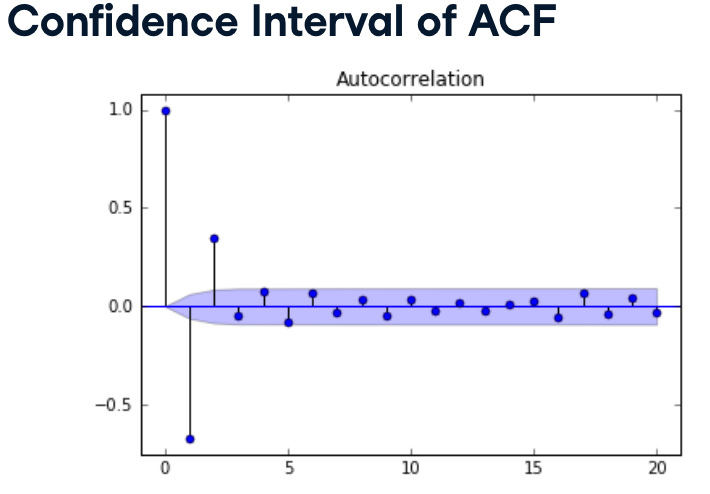
An ACF plot that contains confidence intervals for each lag, which is the blue region in the figure.
alpha determines the width of the confidence intervals. For example, if alpha equals 0-point-05, that means that if the true autocorrelation at that lag is zero, there is only a 5% chance the sample autocorrelation will fall outside that window. You will get a wider confidence interval if you set alpha lower, or if you have fewer observations. An approximation to the width of the 95% confidence intervals, if you make some simplifying assumptions, is plus or minus 2 over the square root of the number of observations in your series. Incidentally, if you don't want to see confidence intervals in your plot, set alpha equal to one.

# White Noise

 a series with mean that is constant with time, a variance that is also constant with time, and zero autocorrelation at all lags. There are several special cases of White Noise. For example, if the data is white noise but also has a normal, or Gaussian, distribution, then it is called Gaussian White Noise.
 
 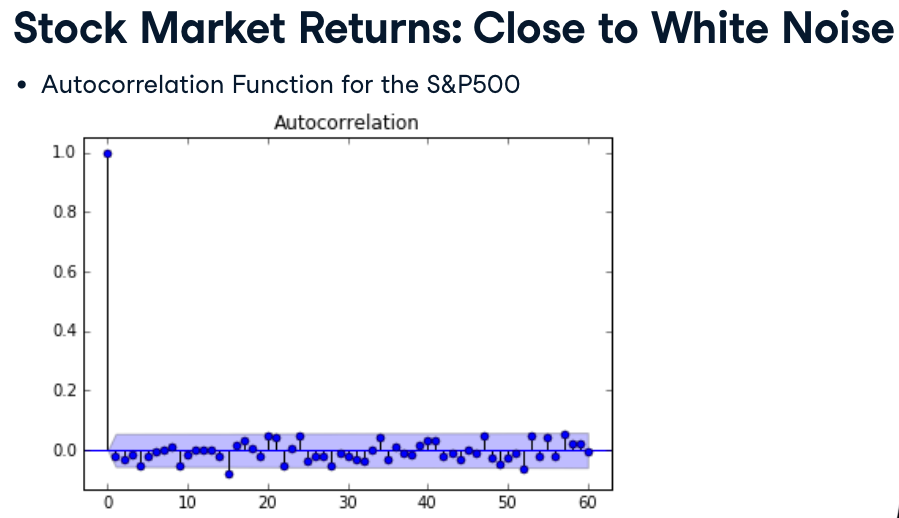

# Random Walk

In a random walk, today's price is equal to yesterday's price plus some noise. 

The change in price of a random walk is just White Noise. Incidentally, if prices are in logs, then the difference in log prices is one way to measure returns. The bottom line is that if stock *prices* follow a random walk, then stock *returns* are White Noise. You can't forecast a random walk. The best guess for tomorrow's price is simply today's price.

## Random Walk with Drift
In a random walk with drift, prices on average drift by mu every period. And the change in price for a random walk with drift is still white noise but with a mean of mu. So if we now think of stock prices as a random walk with drift, then the returns are still white noise, but with an average return of mu instead of zero.

## Statistical Test for Random Walk
To test whether a series like stock prices follows a random walk, you can regress current prices on lagged prices. If the slope coefficient, beta, is not significantly different from one, then we cannot reject the null hypothesis that the series is a random walk. However, if the slope coefficient is significantly less than one, then we can reject the null hypothesis that the series is a random walk.

An identical way to do that test is to regress the difference in prices on the lagged price, and instead of testing whether the slope coefficient is 1, now we test whether it is zero. This is called the "Dickey-Fuller" test. If you add more lagged prices on the right hand side, then it's called the Augmented Dickey-Fuller test.

## Augmented Dickey Fuller Test
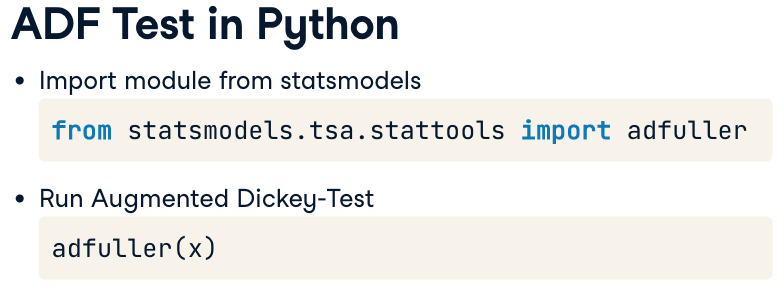

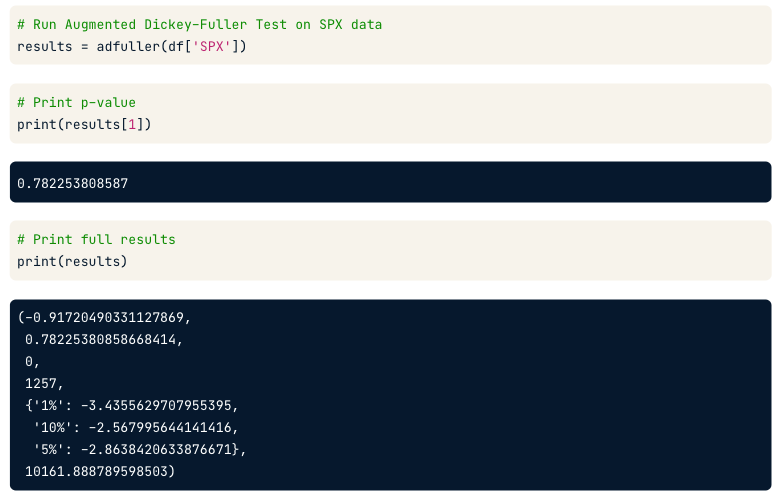
As an example, let's run the Augmented Dickey-Fuller test on a time series of S&P500 prices using the adfuller function. The results are stored in results. The main output we're interested in is the p-value of the test. If the p-value is less than 5%, we can reject the null hypothesis that the series is a random walk with 95% confidence. In this case, the p-value is much higher than point-05 - it's 0-point-78. Therefore, we cannot reject the null hypothesis that the S&P500 is a random walk. You can also print out the full output of the test, which gives other information, like the number of observations (1257), the test statistic (-point-917) and the critical values of the test statistic for various alphas - 1%, 10%, and 5%.

# Stationarity

Stationarity defined: the joint distribution of the observations do not depend on time. A less restrictive version of stationarity, and one that is easier to test, is weak stationarity, which just means that the mean, variance, and autocorrelations of the observations do not depend on time. In other words, for the autocorrelation, the correlation between X-t and X-(t-tau) is only a function of the lag tau, and not a function of time.
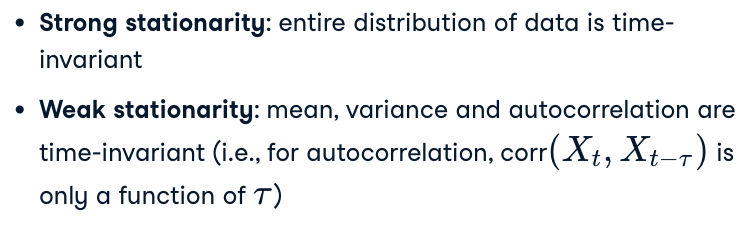

If a process is not stationary, then it becomes difficult to model. Modeling involves estimating a set of parameters, and if a process is not stationary, and the parameters are different at each point in time, then there are too many parameters to estimate. You may end up having more parameters than actual data! So stationarity is necessary for a parsimonious model, one with a smaller set of parameters to estimate.

## Transforming NonStationary Series Into Stationary Series
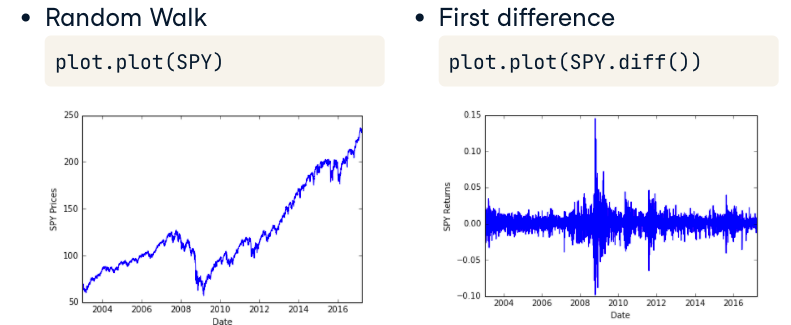
Many non-stationary series can be made stationary through a simple transformation. A Random Walk is a non-stationary series, but if you take the first differences, the new series is White Noise, which is stationary. On the left are S&P500 prices, which is a non-stationary random walk, but if you compute first differences on the right, it becomes a stationary white noise process.

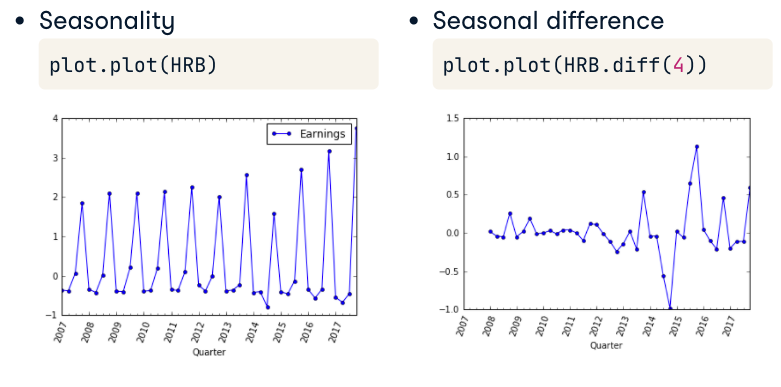
On the left, we have the quarterly earnings for H&R Block, which has a large seasonal component and is therefore not stationary. If we take the seasonal difference, by taking the difference with lag of 4, the transformed series looks stationary.

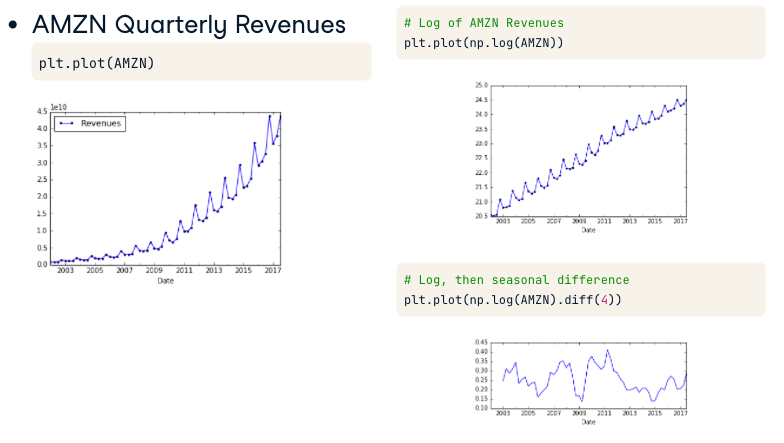
Sometimes, you may need to make two transformations. Here is a time series of Amazon's quarterly revenue. It is growing exponentially as well as exhibiting a strong seasonal pattern. First, if you take only the log of the series, in the upper right, you eliminate the exponential growth. But if you take both the log of the series and then the seasonal difference, in the lower right, the transformed series looks stationary.

# Autoregressive (AR) Models


1. Introducing an AR Model
In an Autoregressive model, or AR model, today's value equals a mean plus a fraction phi of yesterday's value, plus noise. Since there is only one lagged value on the right hand side, this is called an AR model of order 1, or simply an AR(1) model. If the AR parameter, phi, is one, then the process is a random walk. If phi is zero, then the process is white noise. In order for the process to be stable and stationary, phi has to be between -1 and +1.

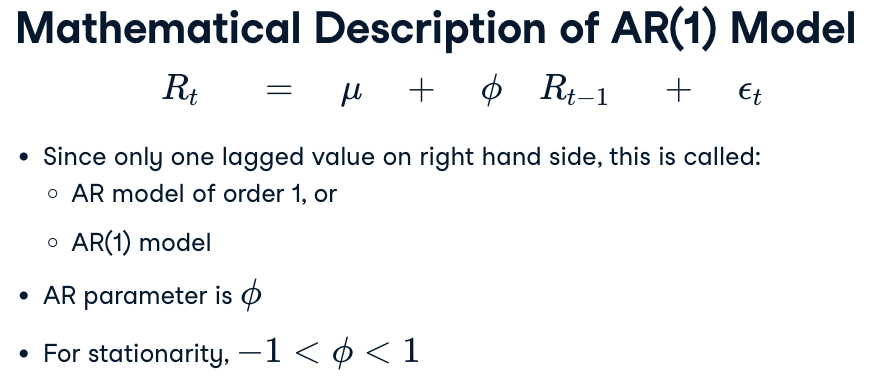

3. Interpretation of AR(1) Parameter
As an example, suppose R_t is a time series of stock returns. If phi is negative, then a positive return last period, at time t-1, implies that this period's return is more likely to be negative. This was referred to as "mean reversion" in Chapter 1. On the other hand, if phi is positive, then a positive return last period implies that this period's return is expected to be positive.

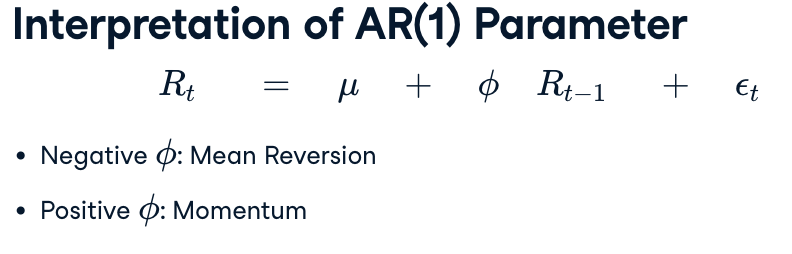

4. Comparison of AR(1) Time Series
Here are four simulated time series with different AR parameters. When phi equals 0.9, it looks close to a random walk. When phi equals minus 0.9, the process looks more erratic - a large positive value is usually followed by a large negative one. The bottom two are similar, but are less exaggerated and closer to white noise.

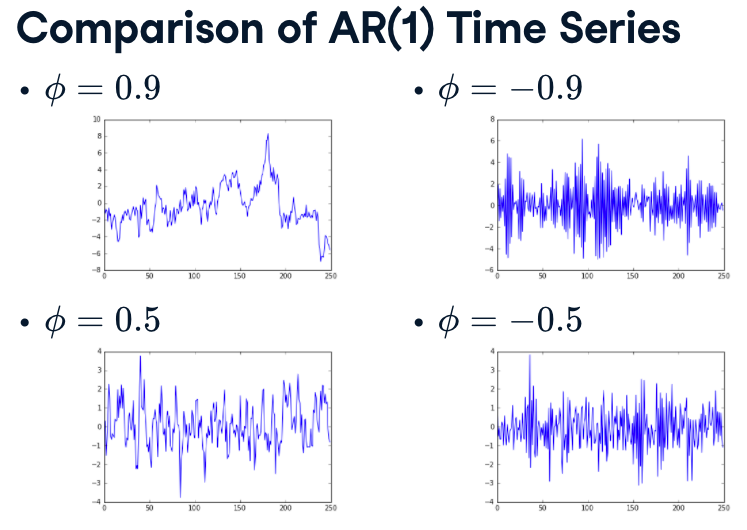

5. Comparison of AR(1) Autocorrelation Functions
Here are four autocorrelation functions for different AR parameters. The autocorrelation decays exponentially at a rate of phi. Therefore if phi is 0-point-9, the lag-1 autocorrelation is 0-point-9, the lag-2 autocorrelation is 0-point-9 squared, the lag-3 autocorrelation is 0-point-9 cubed, etc. When phi is negative, the autocorrelation function still decays exponentially, but the signs of the autocorrelation function reverse at each lag.

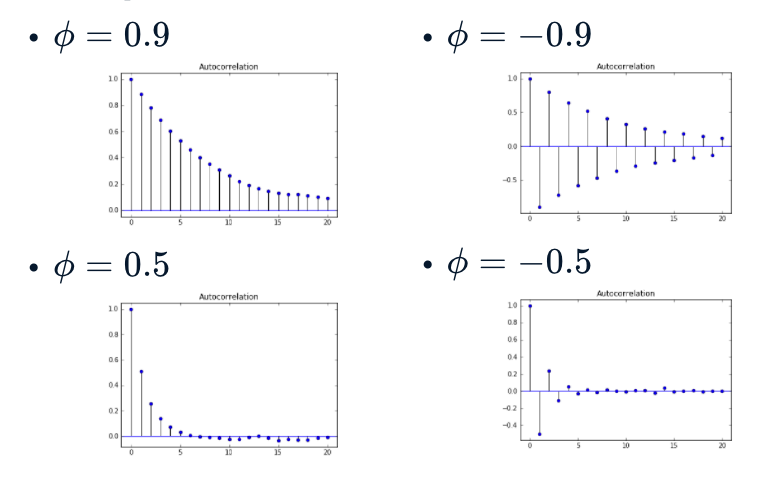

6. Higher Order AR Models
So far, we've been only looking at AR(1) models. The model can be extended to include more lagged values and more phi parameters. Here we show an AR(1), an AR(2), and an AR(3). 

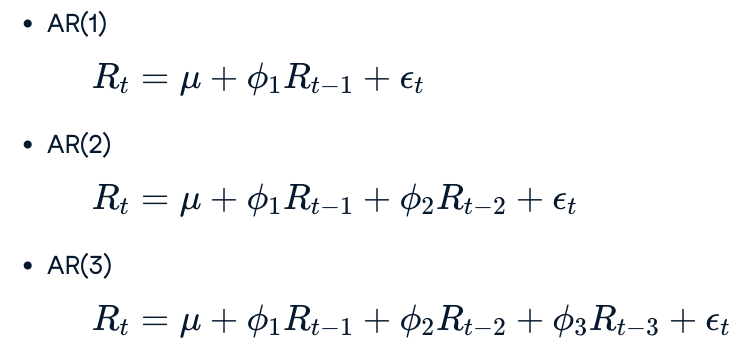

7. Simulating an AR Process
Often, if you want to study and understand a pure AR process, it is useful to work with simulated data. Statsmodels provides modules for simulating AR processes. First, import the class, ArmaProcess. Then define the order and parameters of the AR process. The convention is a little counterintuitive: You must include the zero-lag coefficient of 1, and the sign of the other coefficient is the opposite of what we have been using. For example, for an AR(1) process with phi equal to plus 0-point-9, the second element of the ar array should be the opposite sign, *minus 0-point-9*. This is consistent with the time series literature in the field of signal processing. You also have to input the MA parameters. You will learn about MA models in the next chapter, so for now, just ignore the MA part. Then, you create an instance of the class ArmaProcess. To simulate data, use the method generate_sample, with the number of simulated samples as an argument.

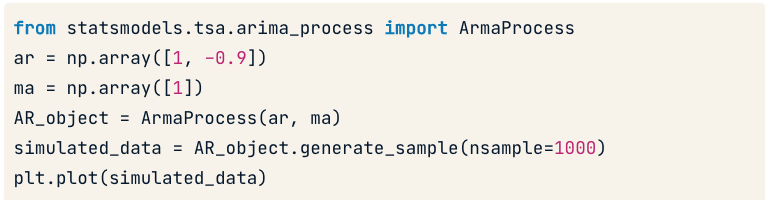

# 